# Chapter 10 케라스를 사용한 인공 신경망

### 퍼셉트론

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

### 이미지 분류기 만들기

In [2]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [3]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [13]:
model.get_layer('dense') is hidden1

True

In [14]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.05462627,  0.05368403, -0.01136398, ..., -0.03367336,
         0.07320993, -0.00307365],
       [-0.06756249,  0.04326396, -0.01539396, ..., -0.02025968,
         0.00751147,  0.05052502],
       [ 0.05672024,  0.02989394,  0.05582963, ..., -0.04017427,
         0.04542794,  0.02948092],
       ...,
       [ 0.06005614, -0.04139311,  0.06323668, ..., -0.0056174 ,
         0.00519624,  0.06391887],
       [ 0.06731918, -0.03294065, -0.01764531, ...,  0.04330032,
         0.05855928,  0.04677332],
       [-0.05742655, -0.03991492,  0.01147687, ...,  0.05534402,
        -0.05739127,  0.00981458]], dtype=float32)

In [15]:
weights.shape

(784, 300)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
biases.shape

(300,)

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7242 - accuracy: 0.7647 - val_loss: 0.5265 - val_accuracy: 0.8198
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4915 - accuracy: 0.8309 - val_loss: 0.4420 - val_accuracy: 0.8482
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4476 - accuracy: 0.8441 - val_loss: 0.4146 - val_accuracy: 0.8572
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4177 - accuracy: 0.8540 - val_loss: 0.4042 - val_accuracy: 0.8594
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3977 - accuracy: 0.8605 - val_loss: 0.3955 - val_accuracy: 0.8642
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3811 - accuracy: 0.8649 - val_loss: 0.3674 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3662 - accuracy: 0.8710 - val_loss: 0.3781 - val_accuracy:

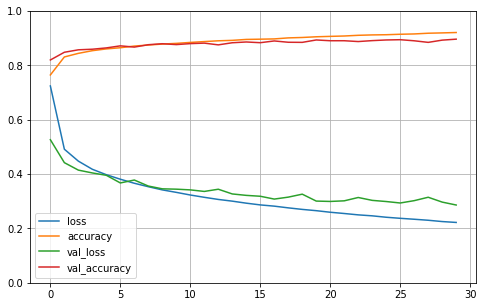

In [22]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3294 - accuracy: 0.8823


[0.32938382029533386, 0.8823000192642212]

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [26]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### 회귀 MLP

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [29]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7065 - val_loss: 0.5302
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4416 - val_loss: 0.4503
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4048 - val_loss: 0.4219
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3973 - val_loss: 0.5952
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3852 - val_loss: 0.4024
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3760 - val_loss: 0.3993
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3736 - val_loss: 0.3914
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3655 - val_loss: 0.3994
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3650 - val_loss: 0.4015
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3621 - val_loss: 0.4104

### 함수형 API

In [30]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [31]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]         

In [32]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [33]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.3582 - val_loss: 1.3592
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8005 - val_loss: 0.8023
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6416 - val_loss: 0.6742
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5876 - val_loss: 0.6283
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5556 - val_loss: 0.5973
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5312 - val_loss: 0.5714
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5116 - val_loss: 0.5517
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4951 - val_loss: 0.5354
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4813 - val_loss: 0.5196
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4697 - val_loss: 0.5068

In [34]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4151 - val_loss: 0.4446
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4129 - val_loss: 0.4402
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4111 - val_loss: 0.4377
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4094 - val_loss: 0.4373
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4079 - val_loss: 0.4345
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4063 - val_loss: 0.4330
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4051 - val_loss: 0.4314
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4039 - val_loss: 0.4307
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4026 - val_loss: 0.4268
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4015 - val_loss: 0.4248

### 서브클래싱 API

In [38]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

### 하이퍼파라미터 튜닝

In [39]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [40]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [41]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.3529 - val_loss: 0.6506
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5857 - val_loss: 0.5723
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5155 - val_loss: 0.5140
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4700 - val_loss: 0.4829
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4405 - val_loss: 0.4579
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4230 - val_loss: 0.4431
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4112 - val_loss: 0.4342
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4029 - val_loss: 0.4337
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3965 - val_loss: 0.4177
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3909 - val_lo

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_